<a href="https://colab.research.google.com/github/odefendi/LeaveORNot/blob/main/LeaveOrNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Employee.csv')

In [6]:
categorical_cols = ['Education', 'City', 'Gender', 'EverBenched']
for col in categorical_cols:
  df[col] = LabelEncoder().fit_transform(df[col])

X = df[['Education',
        'JoiningYear',
        'City',
        'PaymentTier',
        'Age',
        'Gender',
        'EverBenched',
        'ExperienceInCurrentDomain']]
y = LabelEncoder().fit_transform(df['LeaveOrNot'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)
vn, fp, fn, vp = cm.ravel()

acuracia = accuracy_score(y_test, y_pred)
sensibilidade = recall_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
especificidade = vn / (vn + fp)

print("Matriz de Confusão:\n", cm)
print(f"Acurácia:       {acuracia:.2f}")
print(f"Sensibilidade:  {sensibilidade:.2f}")
print(f"Precisão:       {precisao:.2f}")
print(f"Especifidade:   {especificidade:.2f}")
print(f"F-Score:        {f1:.2f}")

Matriz de Confusão:
 [[124  17]
 [ 40  19]]
Acurácia:       0.71
Sensibilidade:  0.32
Precisão:       0.53
Especifidade:   0.88
F-Score:        0.40


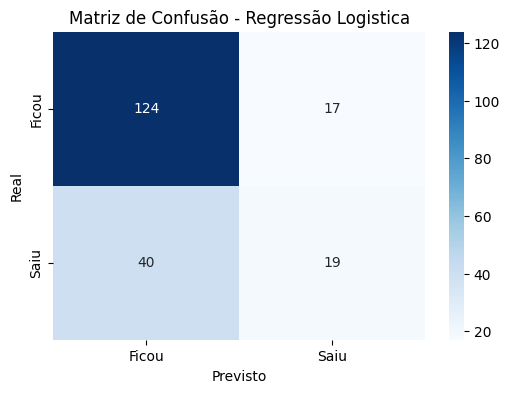

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Ficou', 'Saiu'],
    yticklabels=['Ficou', 'Saiu']
)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logistica')
plt.show()